In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.applications import vgg16
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import os
from tensorflow.keras.applications.vgg19 import VGG19

## Etiquetas

##### **nv**
Los nevos melanocíticos son neoplasias benignas de melanocitos y se presentan en una miríada de variantes, todas ellas incluidas en nuestra serie. Las variantes pueden diferir significativamente desde el punto de vista dermatoscópico.\
[6705 imágenes]

##### **mel**
El melanoma es una neoplasia maligna derivada de los melanocitos que puede aparecer en distintas variantes. Si se extirpa en una fase temprana, puede curarse mediante una simple extirpación quirúrgica. Los melanomas pueden ser invasivos o no invasivos (in situ). Incluimos todas las variantes de melanoma, incluido el melanoma in situ, pero excluimos el melanoma no pigmentado, subungueal, ocular o mucoso.\
[1113 imágenes]

##### **bkl**
La "queratosis benigna" es una clase genérica que incluye la queratosis seborreica ("verruga senil"), el lentigo solar -que puede considerarse una variante plana de la queratosis seborreica- y la queratosis de tipo liquen plano (LPLK), que corresponde a una queratosis seborreica o un lentigo solar con inflamación y regresión [22]. Los tres subgrupos pueden parecer diferentes desde el punto de vista dermatoscópico, pero los hemos agrupado porque son similares desde el punto de vista biológico y a menudo se describen bajo el mismo término genérico desde el punto de vista histopatológico. Desde un punto de vista dermatoscópico, las queratosis similares al liquen plano son especialmente difíciles porque pueden mostrar características morfológicas que imitan al melanoma [23] y a menudo se les practica una biopsia o una extirpación por motivos diagnósticos.\
[1099 imágenes]

##### **bcc**
El carcinoma basocelular es una variante común del cáncer epitelial de piel que rara vez hace metástasis pero que crece destructivamente si no se trata. Aparece en diferentes variantes morfológicas (plano, nodular, pigmentado, quístico, etc.) [21], todas ellas incluidas en este conjunto.\
[514 imágenes]

##### **akiec**
Las queratosis actínicas (queratosis solares) y el carcinoma intraepitelial (enfermedad de Bowen) son variantes comunes no invasivas del carcinoma de células escamosas que pueden tratarse localmente sin cirugía. Algunos autores los consideran precursores de carcinomas de células escamosas y no carci- nomas propiamente dichos. Sin embargo, hay acuerdo en que estas lesiones pueden evolucionar a un carcinoma escamoso invasivo, que no suele estar pigmentado. Ambas neoplasias suelen presentar descamación superficial y, por lo general, carecen de pigmento. Las queratosis actínicas son más frecuentes en la cara y la enfermedad de Bowen es más frecuente en otras zonas del cuerpo. Dado que ambos tipos son producidos por la luz UV, la piel circundante suele estar muy dañada por el sol, excepto en los casos de enfermedad de Bowen, que están causados por la infección por el virus del papiloma humano y no por la luz UV. Existen variantes pigmentadas para la enfermedad de Bowen [19] y para la queratosis actínica [20]. Ambas están incluidas en este conjunto.\
[327 imágenes]

##### **vasc**
Las lesiones cutáneas vasculares del conjunto de datos van desde angiomas en cereza hasta angioqueratomas [25] y granulomas piógenos [26]. Las hemorragias también se incluyen en esta categoría.\
[142 imágenes]

##### **df**
El dermatofibroma es una lesión cutánea benigna considerada una proliferación benigna o una reacción inflamatoria a un traumatismo mínimo. A menudo presenta una zona central de fibrosis dermatoscópica [24].\
[115 imágenes]

In [2]:
DPA = dict(
        batch_size        =  32,    # 8; 16; 32; 64; bigger batch size => moemry allocation issue
        epochs            =  20,    # 5; 10; 20;
        verbose           =   1,    # 0; 1
        workers           =   4,    # 1; 2; 3
        validationsplit   =  0.2,
        
        numClas           = 7,
        optimizer         = 'adam', # 'SGD', 'RMSprop'

        RANDOM_STATE      =  123,   
    
        # Path to save a model
        path_model        = '../Guardados',

        # Images sizes
        img_size          = 32, 
        img_height        = 32, 
        img_width         = 32, 

        # Images augs
        ROTATION          = 180.0,
        ZOOM_RANGE        = 0.5,
        HSHIFT            = 10.0,
        WSHIFT            = 10.0,
        SHEAR             = 5.0,
        HFLIP             = True,
        VFLIP             = True,
)

In [3]:
baseDR = '../../Dataset/ModeloFinal/Multilabel'
os.mkdir(baseDR)


#Vamos a crear la estructura de directorios que espera la funcion flow_from_directory


# primero crearemos los dos archivos principales por los cuales se dividiran nuestro dataset.

# trainDR
trainDR = os.path.join(baseDR, 'trainDR')
os.mkdir(trainDR)

# valDR
valDR = os.path.join(baseDR, 'valDR')
os.mkdir(valDR)


# Ahora crearemos los diferentes archivos para cada clase dentro de directorio train y validation

#trainDR
nv = os.path.join(trainDR, 'nv')
os.mkdir(nv)
mel = os.path.join(trainDR, 'mel')
os.mkdir(mel)
bkl = os.path.join(trainDR, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(trainDR, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(trainDR, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(trainDR, 'vasc')
os.mkdir(vasc)
df = os.path.join(trainDR, 'df')
os.mkdir(df)



#valDR
nv = os.path.join(valDR, 'nv')
os.mkdir(nv)
mel = os.path.join(valDR, 'mel')
os.mkdir(mel)
bkl = os.path.join(valDR, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(valDR, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(valDR, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(valDR, 'vasc')
os.mkdir(vasc)
df = os.path.join(valDR, 'df')
os.mkdir(df)

In [4]:
raw_df = pd.read_csv('../../Datos/Etiquetas.csv')
raw_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [5]:
from sklearn.model_selection import train_test_split

# Creamos el set de validación
y = raw_df['dx']

_, df_val = train_test_split(raw_df, test_size=DPA['validationsplit'], random_state=101, stratify=y)

df_val.shape

(2003, 8)

In [6]:
def identify_val_rows(x):
   
    val_list = list(df_val['image_id'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'


raw_df['train_or_val'] = raw_df['image_id']

raw_df['train_or_val'] = raw_df['train_or_val'].apply(identify_val_rows)
   
# filter out train rows
df_train = raw_df[raw_df['train_or_val'] == 'train']


print(len(df_train))
print(len(df_val))

8012
2003


In [7]:
df_train['dx'].value_counts()

nv       5364
mel       890
bkl       879
bcc       411
akiec     262
vasc      114
df         92
Name: dx, dtype: int64

In [8]:
df_val['dx'].value_counts()

nv       1341
mel       223
bkl       220
bcc       103
akiec      65
vasc       28
df         23
Name: dx, dtype: int64

In [9]:
raw_df.set_index('image_id', inplace=True)


### Movemos las imagenes a las carpetas

In [10]:
import shutil


dataset= os.listdir('../../Datos/Datasets')

train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])


for image in train_list:
    
    fname = image + '.jpg'
    label = raw_df.loc[image,'dx']
    
    if fname in dataset:
        
        src = os.path.join('../../Datos/Datasets', fname)
        
        dst = os.path.join(trainDR, label, fname)
        
        shutil.copyfile(src, dst)
        
        
for image in val_list:
    
    fname = image + '.jpg'
    label = raw_df.loc[image,'dx']
    
    if fname in dataset:
        
        src = os.path.join('../../Datos/Datasets', fname)
        
        dst = os.path.join(valDR, label, fname)
        
        shutil.copyfile(src, dst)

#### Comprobamos que el numero de imagenes en cada carpeta coincide con los valores de las columnas del dataset

In [11]:
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/nv')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/mel')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/bkl')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/bcc')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/akiec')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/vasc')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/df')))

5364
890
879
411
262
114
92


In [12]:
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/nv')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/mel')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/bkl')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/bcc')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/akiec')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/vasc')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/df')))

1341
223
220
103
65
28
23


In [13]:
augClass = ['mel','bkl','bcc','akiec','vasc','df']

for item in augClass:
    
    
    aug_dir = '../../Dataset/aug_dir'
    os.mkdir(aug_dir)
    
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    
    img_class = item

    
    img_list = os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/' + img_class)

   
    for fname in img_list:
            # source path to image
            src = os.path.join('../../Dataset/ModeloFinal/Multilabel/trainDR/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    
    path = aug_dir
    save_path = '../../Dataset/ModeloFinal/Multilabel/trainDR/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=DPA['ROTATION'],
        width_shift_range=DPA['WSHIFT'],
        height_shift_range=DPA['HSHIFT'],
        zoom_range=DPA['ZOOM_RANGE'],
        horizontal_flip=DPA['HFLIP'],
        vertical_flip=DPA['VFLIP'],
        fill_mode='nearest'
    )


    aug_datagen = datagen.flow_from_directory(
        path,
        save_to_dir=save_path,
        save_format='jpg',
        target_size=(DPA['img_size'], DPA['img_size']),
        batch_size=DPA['batch_size']
    )



  
    
    num_aug_images_wanted = 6000 
    
   
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/DPA['batch_size']))

   
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
   
    shutil.rmtree('../../Dataset/aug_dir')

Found 890 images belonging to 1 classes.
Found 879 images belonging to 1 classes.
Found 411 images belonging to 1 classes.
Found 262 images belonging to 1 classes.
Found 114 images belonging to 1 classes.
Found 92 images belonging to 1 classes.


In [14]:

print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/nv')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/mel')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/bkl')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/bcc')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/akiec')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/vasc')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/trainDR/df')))

5364
5980
5946
5946
5502
5358
5768


In [15]:
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/nv')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/mel')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/bkl')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/bcc')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/akiec')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/vasc')))
print(len(os.listdir('../../Dataset/ModeloFinal/Multilabel/valDR/df')))

1341
223
220
103
65
28
23


In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    trainDR,                   
    target_size=(DPA['img_size'], DPA['img_size']),
    batch_size = DPA['batch_size'],
    class_mode='categorical',
)


valid_generator = valid_datagen.flow_from_directory(
    valDR,                   
    target_size=(DPA['img_size'], DPA['img_size']),
    batch_size = DPA['batch_size'],
    class_mode='categorical',
)


Found 39864 images belonging to 7 classes.
Found 2003 images belonging to 7 classes.


### Este modelo congela todas las capas

In [17]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(DPA['img_size'], DPA['img_size'], 3))



# Agregar una capa de clasificación personalizada
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

x = BatchNormalization()(x)
x = Dropout(0.5)(x)


predictions = Dense(DPA['numClas'], activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [18]:
history = model.fit(train_generator,
          epochs=DPA['epochs'],
          validation_data=valid_generator)

Epoch 1/20
1246/1246 [==============================] - 281s 224ms/step - loss: 1.6331 - accuracy: 0.4048 - val_loss: 1.0703 - val_accuracy: 0.6480
Epoch 2/20
1246/1246 [==============================] - 145s 116ms/step - loss: 1.4085 - accuracy: 0.4477 - val_loss: 0.9328 - val_accuracy: 0.6810
Epoch 3/20
1246/1246 [==============================] - 151s 121ms/step - loss: 1.3857 - accuracy: 0.4571 - val_loss: 0.9448 - val_accuracy: 0.6755
Epoch 4/20
1246/1246 [==============================] - 145s 117ms/step - loss: 1.3671 - accuracy: 0.4659 - val_loss: 0.9102 - val_accuracy: 0.6825
Epoch 5/20
1246/1246 [==============================] - 147s 118ms/step - loss: 1.3548 - accuracy: 0.4684 - val_loss: 0.9027 - val_accuracy: 0.6845
Epoch 6/20
1246/1246 [==============================] - 144s 116ms/step - loss: 1.3353 - accuracy: 0.4728 - val_loss: 0.8884 - val_accuracy: 0.6920
Epoch 7/20
1246/1246 [==============================] - 146s 117ms/step - loss: 1.3257 - accuracy: 0.4813 - val_

In [19]:
loss, accuracy = model.evaluate(valid_generator)

63/63 [==============================] - 13s 199ms/step - loss: 0.8392 - accuracy: 0.7149


In [20]:
model.save('../Guardados/modeloVGGCC.h5')

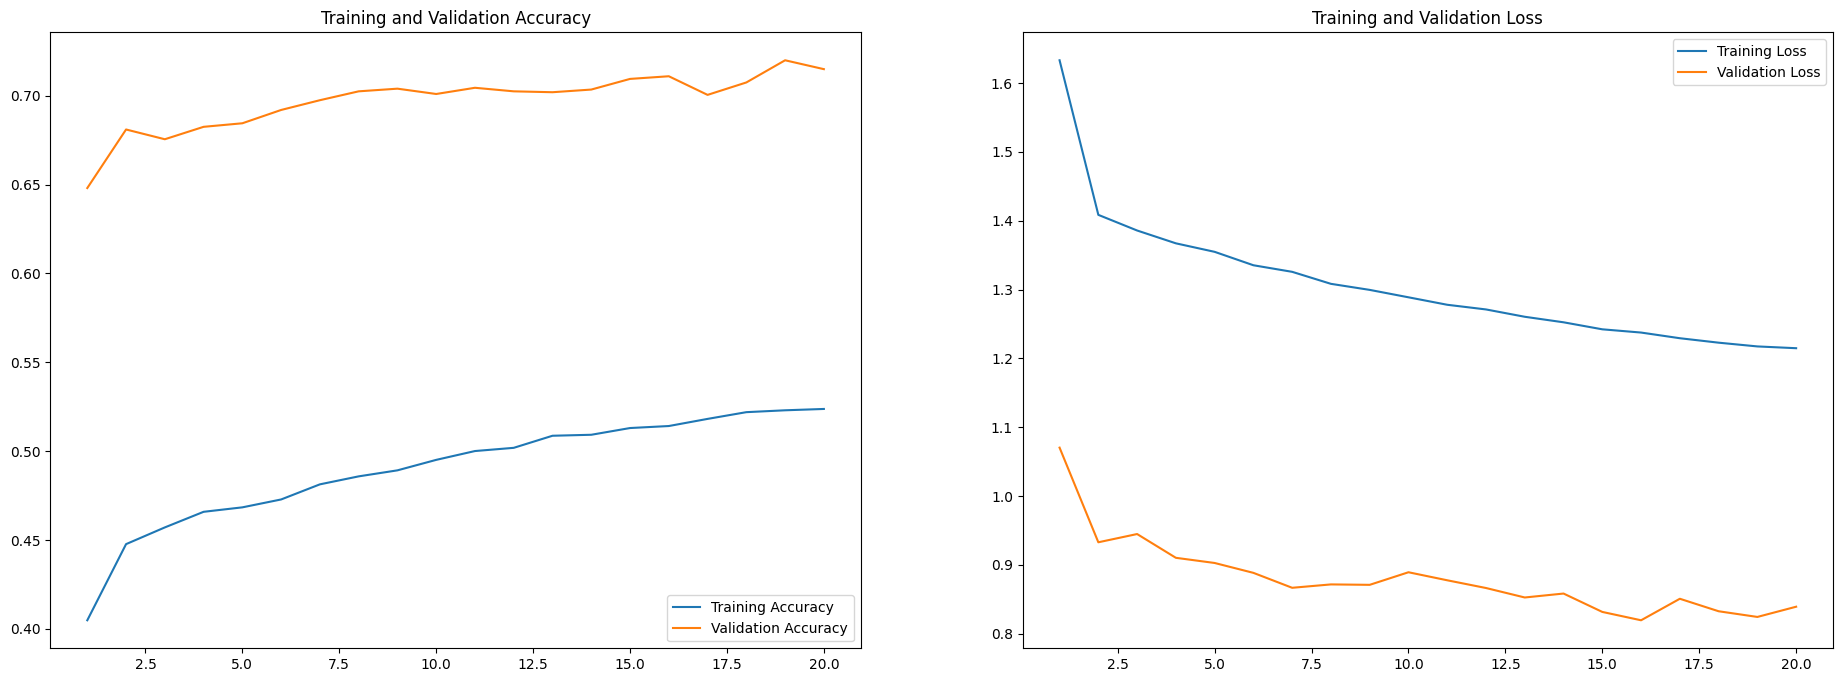

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

metrics = history.history['accuracy']
epochs_range = range(1, len(metrics) + 1) 

plt.figure(figsize=(23, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "../../Dataset/test",                   
    target_size=(DPA['img_size'], DPA['img_size']),
    batch_size = DPA['batch_size'],
    class_mode='categorical',
)

Found 534 images belonging to 7 classes.


17/17 [==============================] - 6s 329ms/step


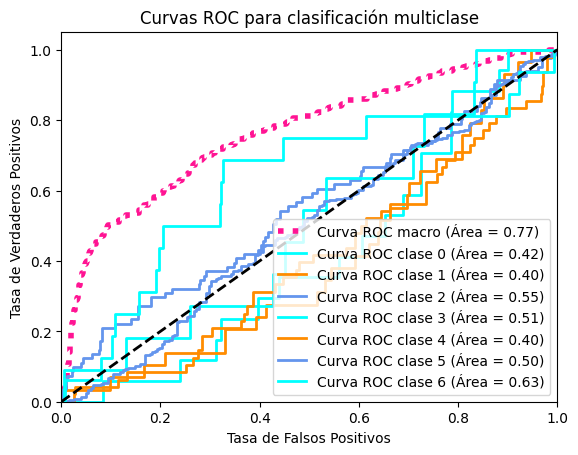

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Obtener las predicciones para el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las etiquetas verdaderas a un formato binario
y_true = test_generator.classes
y_true = label_binarize(y_true, classes=np.arange(DPA['numClas']))

# Calcular las curvas ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(DPA['numClas']):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la curva ROC macro promediada
fpr["macro"], tpr["macro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Mostrar las curvas ROC
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='Curva ROC macro (Área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(DPA['numClas']), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curva ROC clase {0} (Área = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para clasificación multiclase')
plt.legend(loc="lower right")
plt.show()

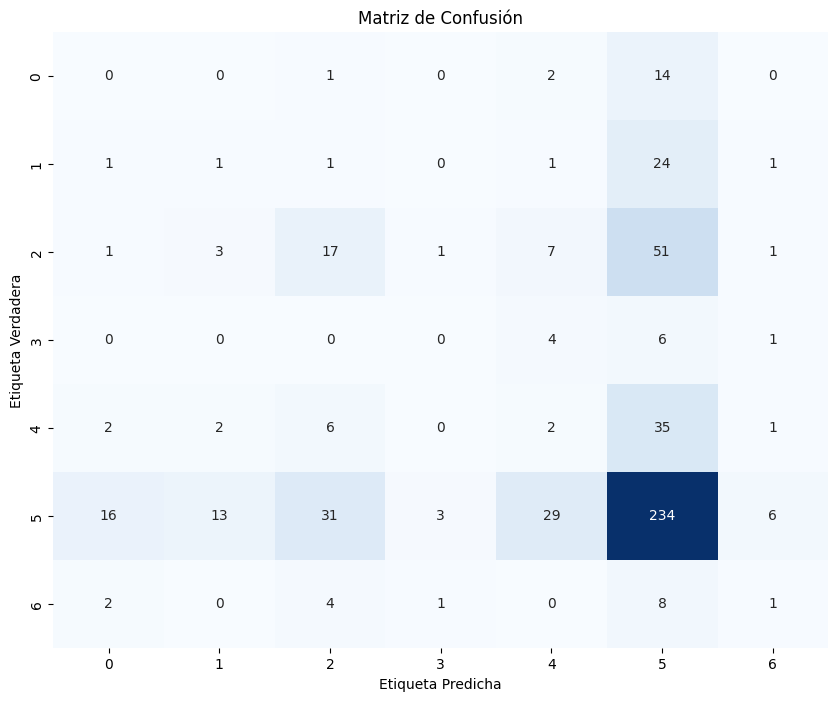

In [24]:
from sklearn.metrics import confusion_matrix, f1_score
# Calcular la matriz de confusión
cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1))

# Mostrar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


In [25]:
# Calcular el F1-score
f1score = f1_score(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), average='weighted')
print("F1-score: {:.4f}".format(f1score))

F1-score: 0.4582
